In [15]:
from script import get_all_data

# df = get_all_data(sample_size=100_000) # 2.92 GB
df = get_all_data(sample_size=10_000)

total data size: 0.33 gb


In [16]:
print(df.columns)
print(df.dtypes)
print(df.head())

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'category'],
      dtype='object')
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
category              object
dtype: object
   rating                                              title  \
0     4.0                                               Soft   
1     4.0  TRY THIS! test on FACE for match not hands, ev...   
2     5.0                                  Excellent product   
3     5.0                                         Five Stars   
4     5.0                                Awesome foundation!   

                                                text  \
0  I wear headbands like this in the evening when...   


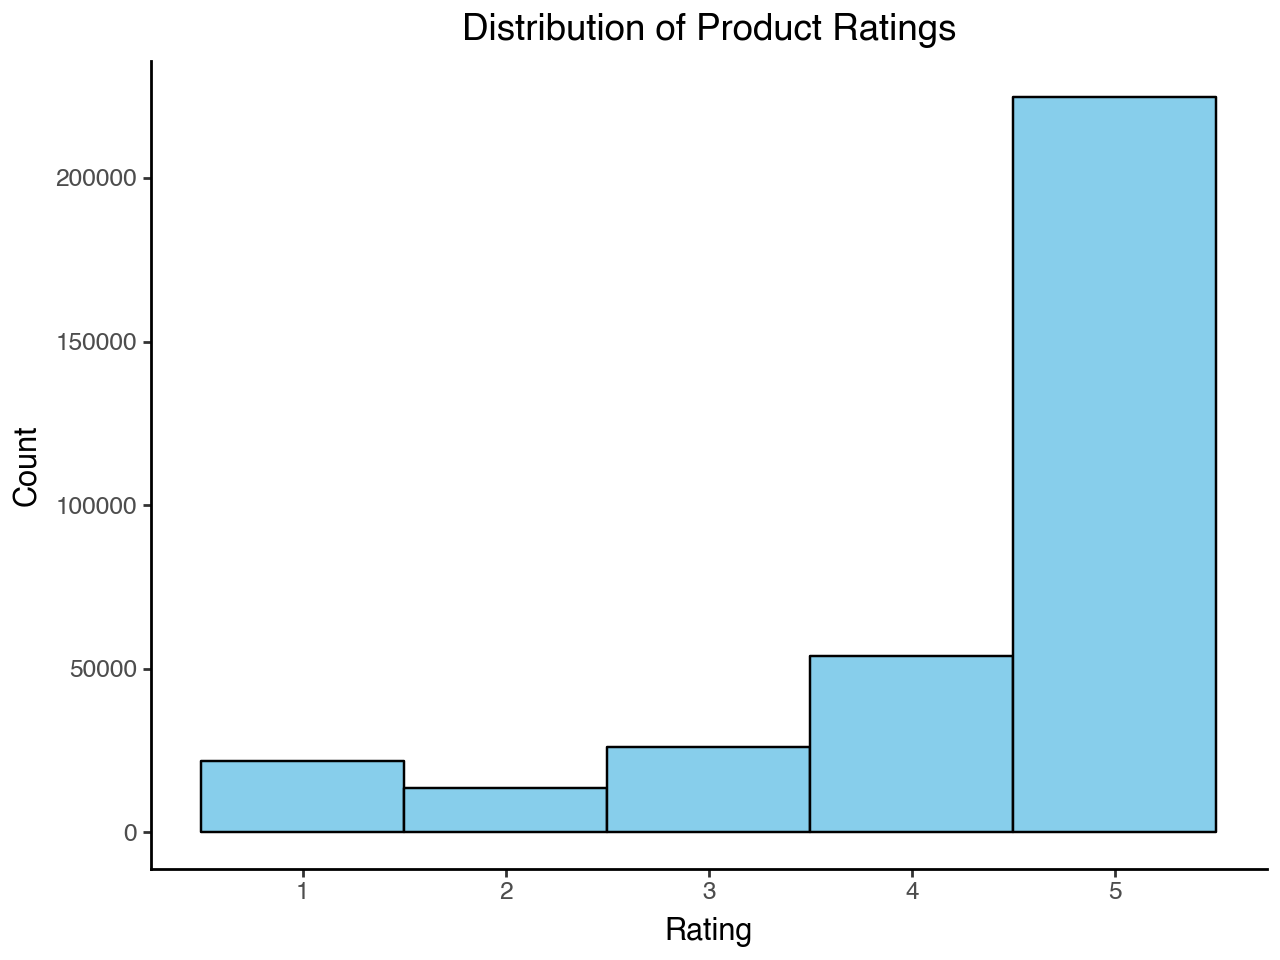

In [17]:
from plotnine import *
import pandas as pd

# rating distribution
(ggplot(df, aes(x='rating'))
 + geom_histogram(binwidth=1, fill='skyblue', color='black')
 + labs(title='Distribution of Product Ratings',
        x='Rating',
        y='Count')
 + theme_classic())

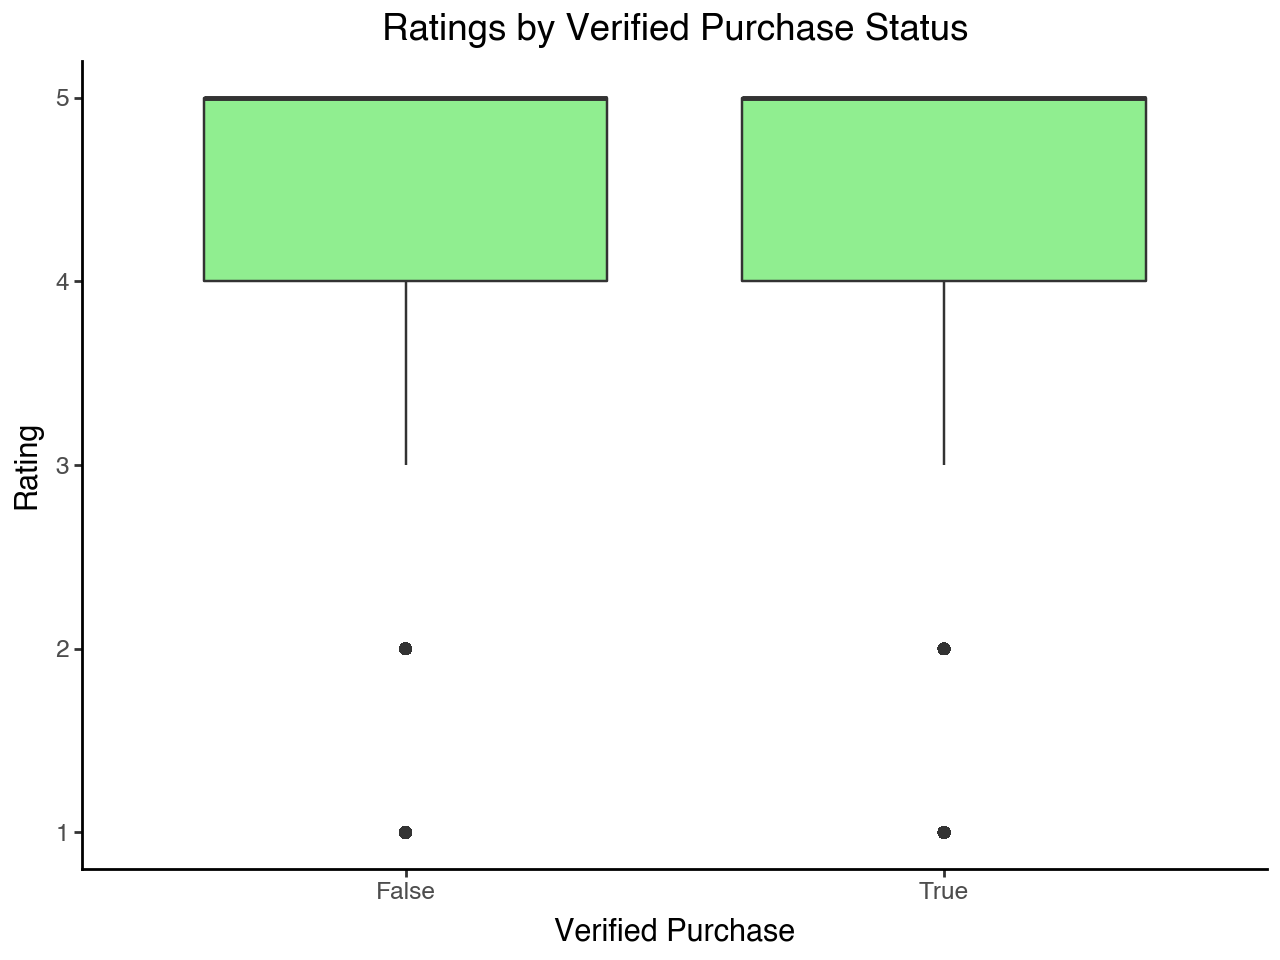

In [18]:
# Verified purchase vs rating
(ggplot(df, aes(x='verified_purchase', y='rating'))
 + geom_boxplot(fill='lightgreen')
 + labs(title='Ratings by Verified Purchase Status',
        x='Verified Purchase',
        y='Rating')
 + theme_classic())

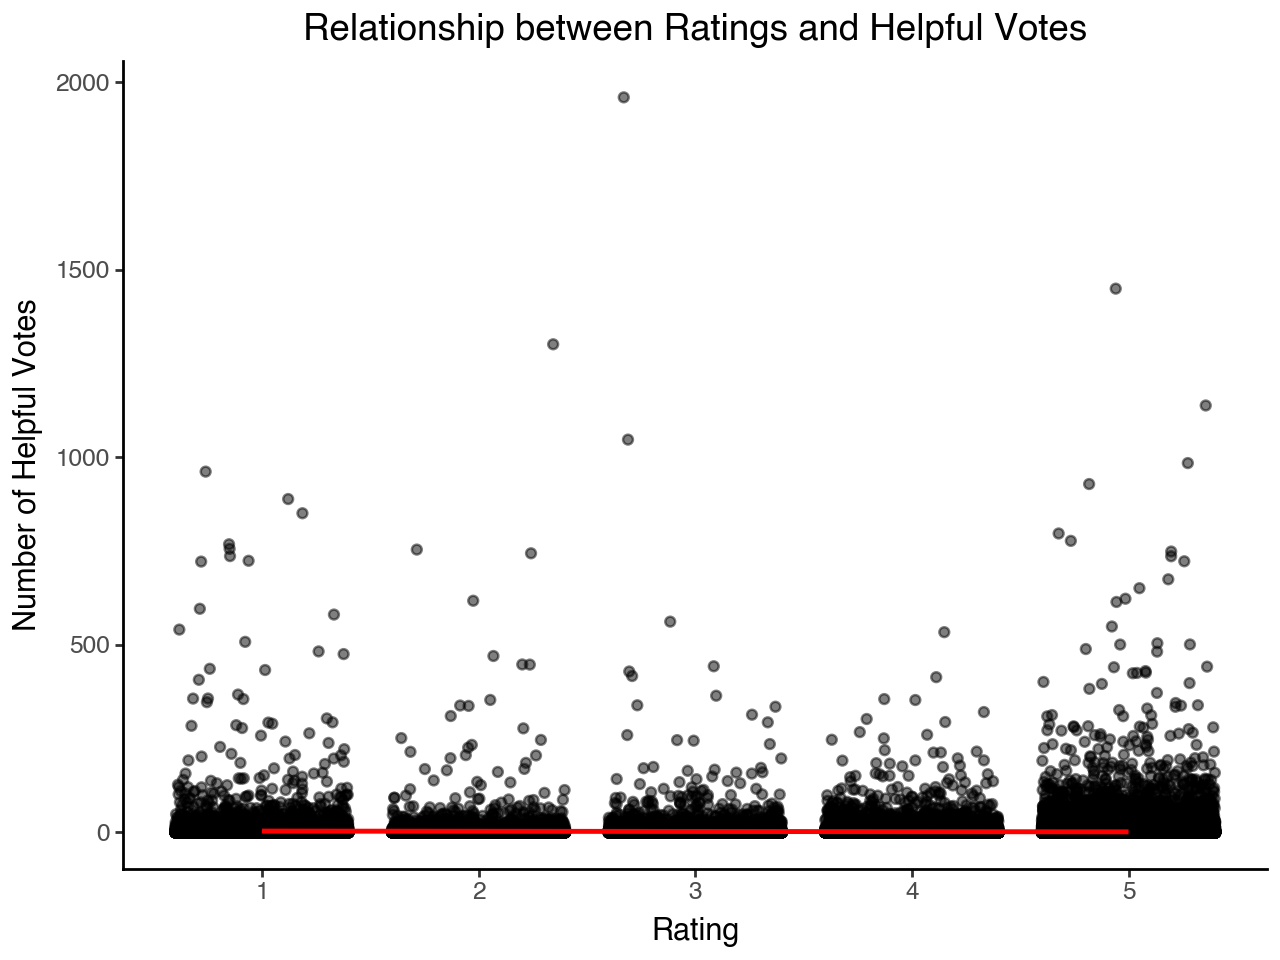

In [19]:
# Relationship between rating and helpful votes
(ggplot(df, aes(x='rating', y='helpful_vote'))
 + geom_jitter(alpha=0.5)
 + geom_smooth(method='lm', color='red')
 + labs(title='Relationship between Ratings and Helpful Votes',
        x='Rating',
        y='Number of Helpful Votes')
 + theme_classic())

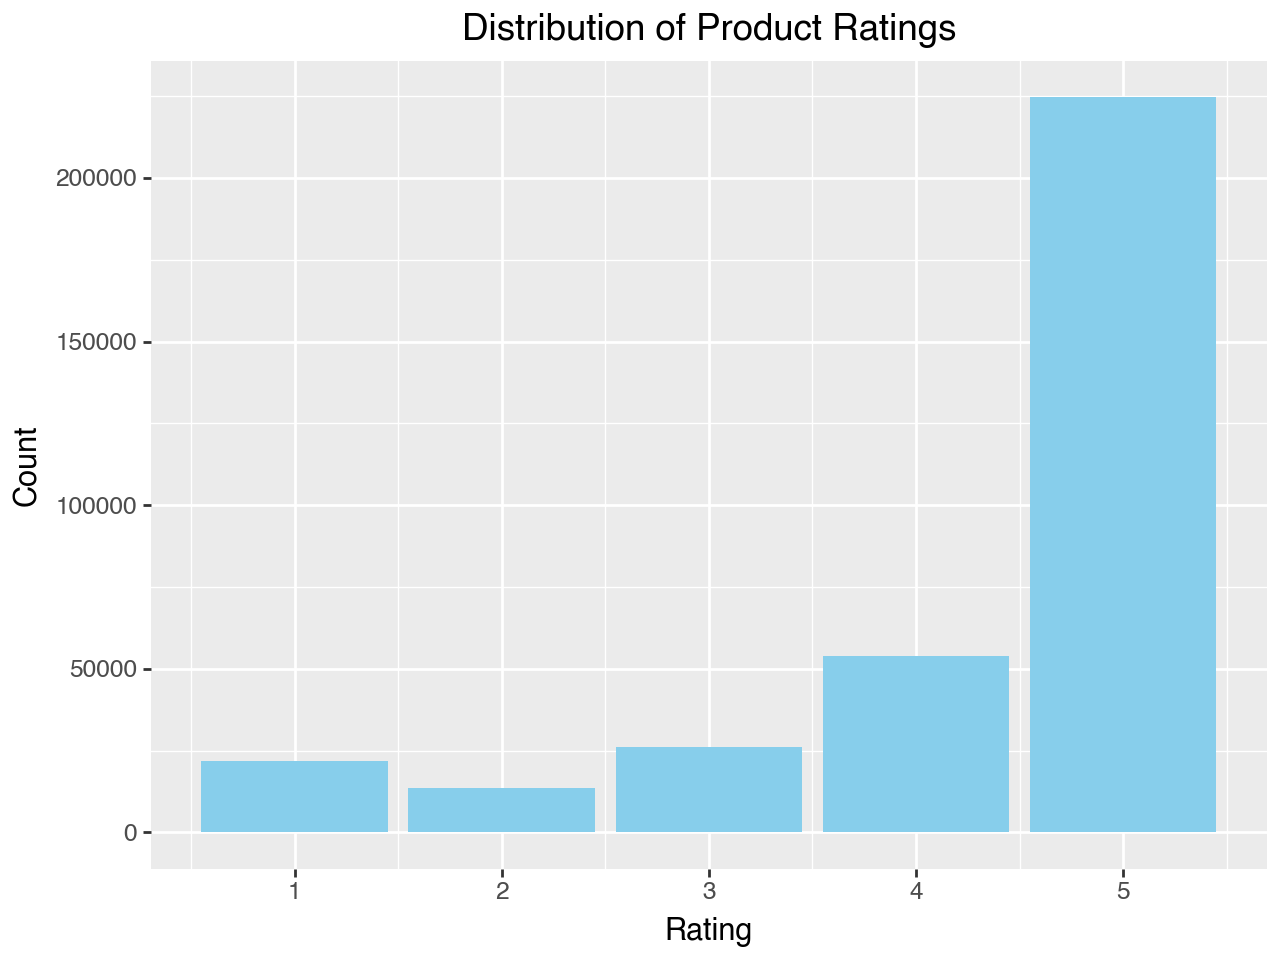

In [20]:
(ggplot(df, aes(x='rating')) 
 + geom_bar(fill='skyblue') 
 + labs(title='Distribution of Product Ratings', 
        x='Rating', 
        y='Count'))


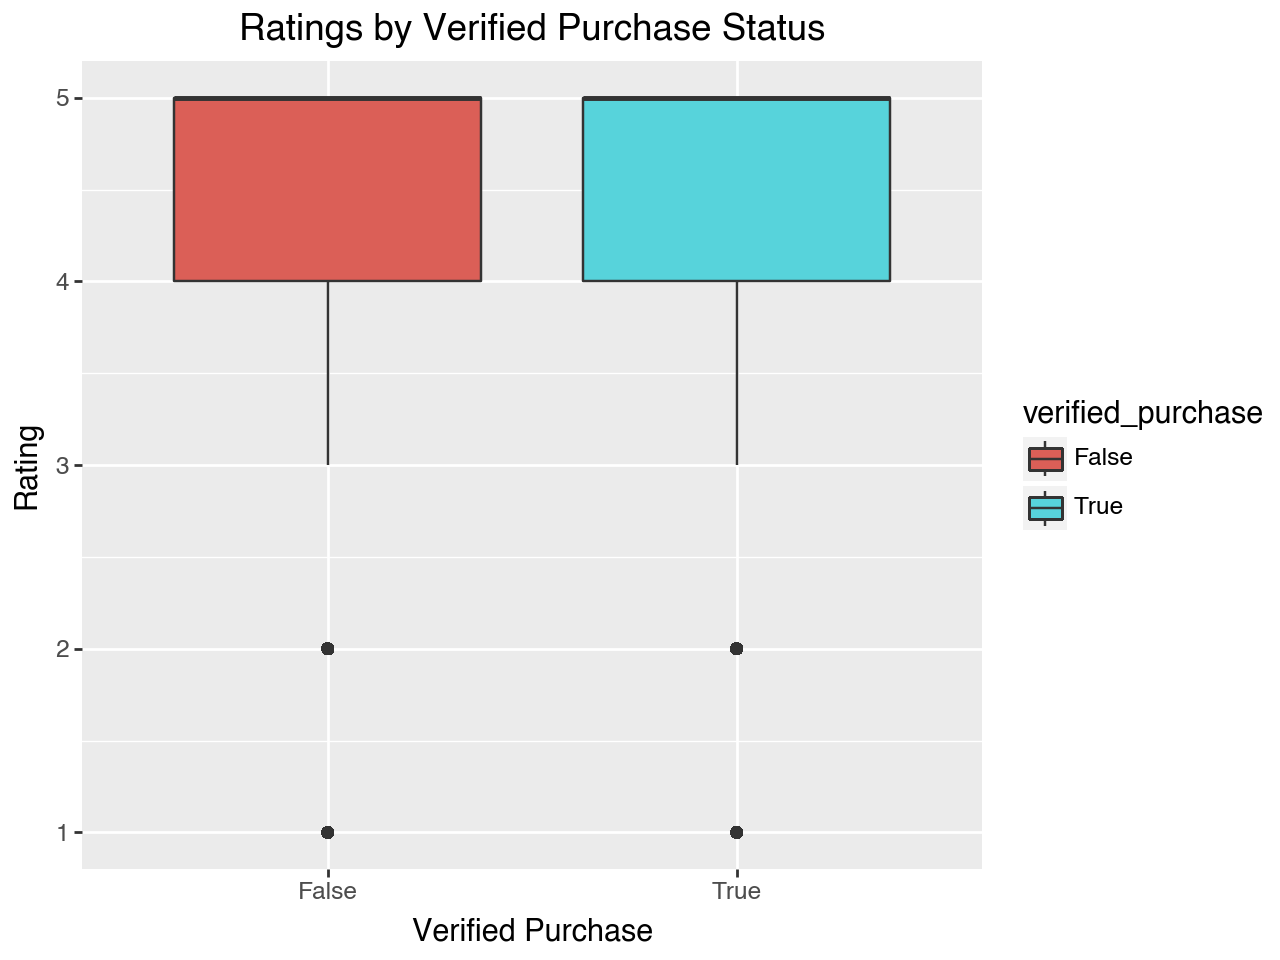

In [21]:
(ggplot(df, aes(x='verified_purchase', y='rating', fill='verified_purchase')) 
 + geom_boxplot() 
 + labs(title='Ratings by Verified Purchase Status',
        x='Verified Purchase',
        y='Rating'))


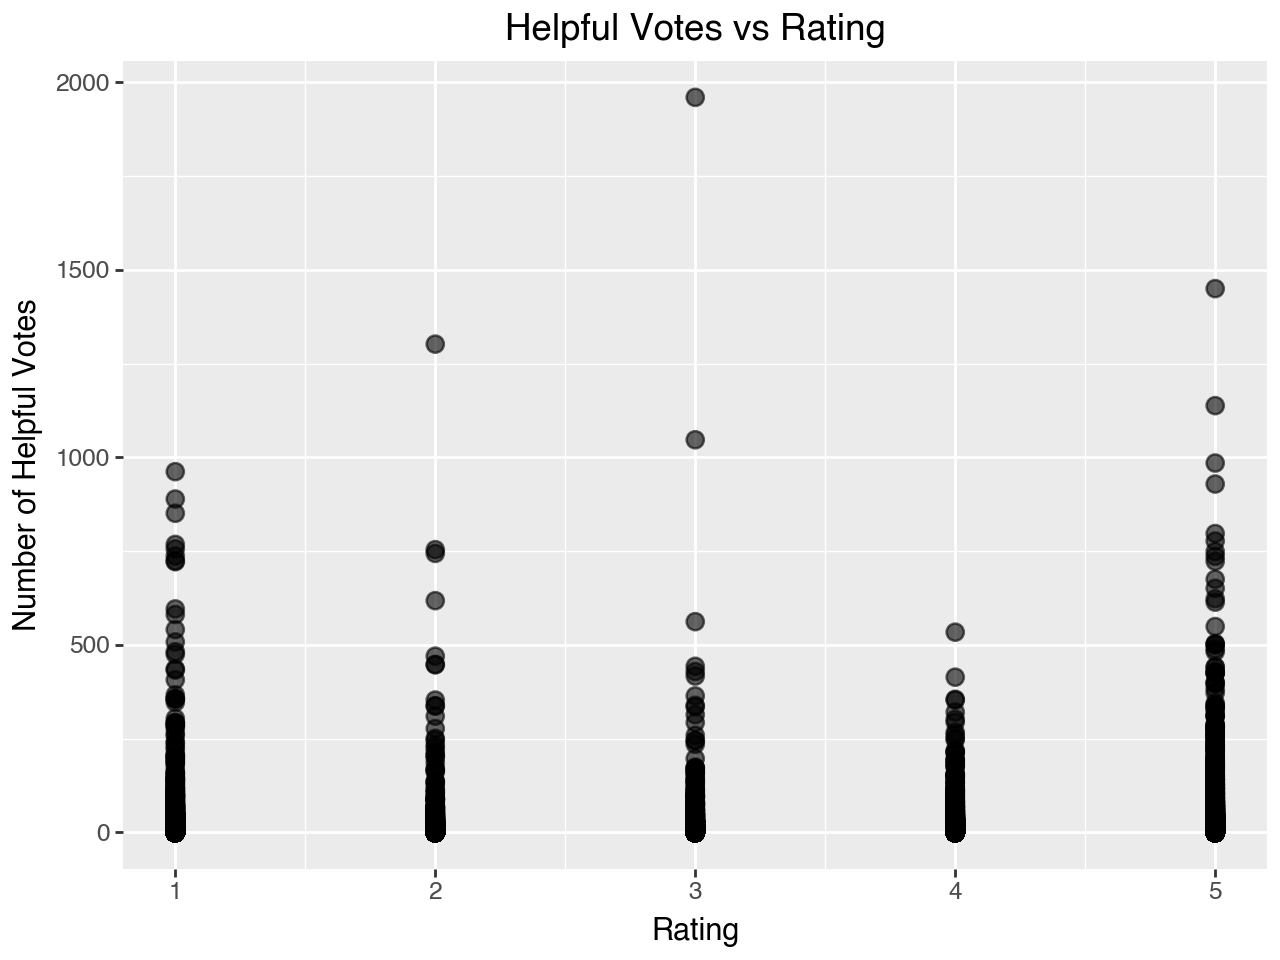

In [22]:
(ggplot(df, aes(x='rating', y='helpful_vote')) 
 + geom_point(size=3, alpha=0.6) 
 + labs(title='Helpful Votes vs Rating',
        x='Rating',
        y='Number of Helpful Votes'))


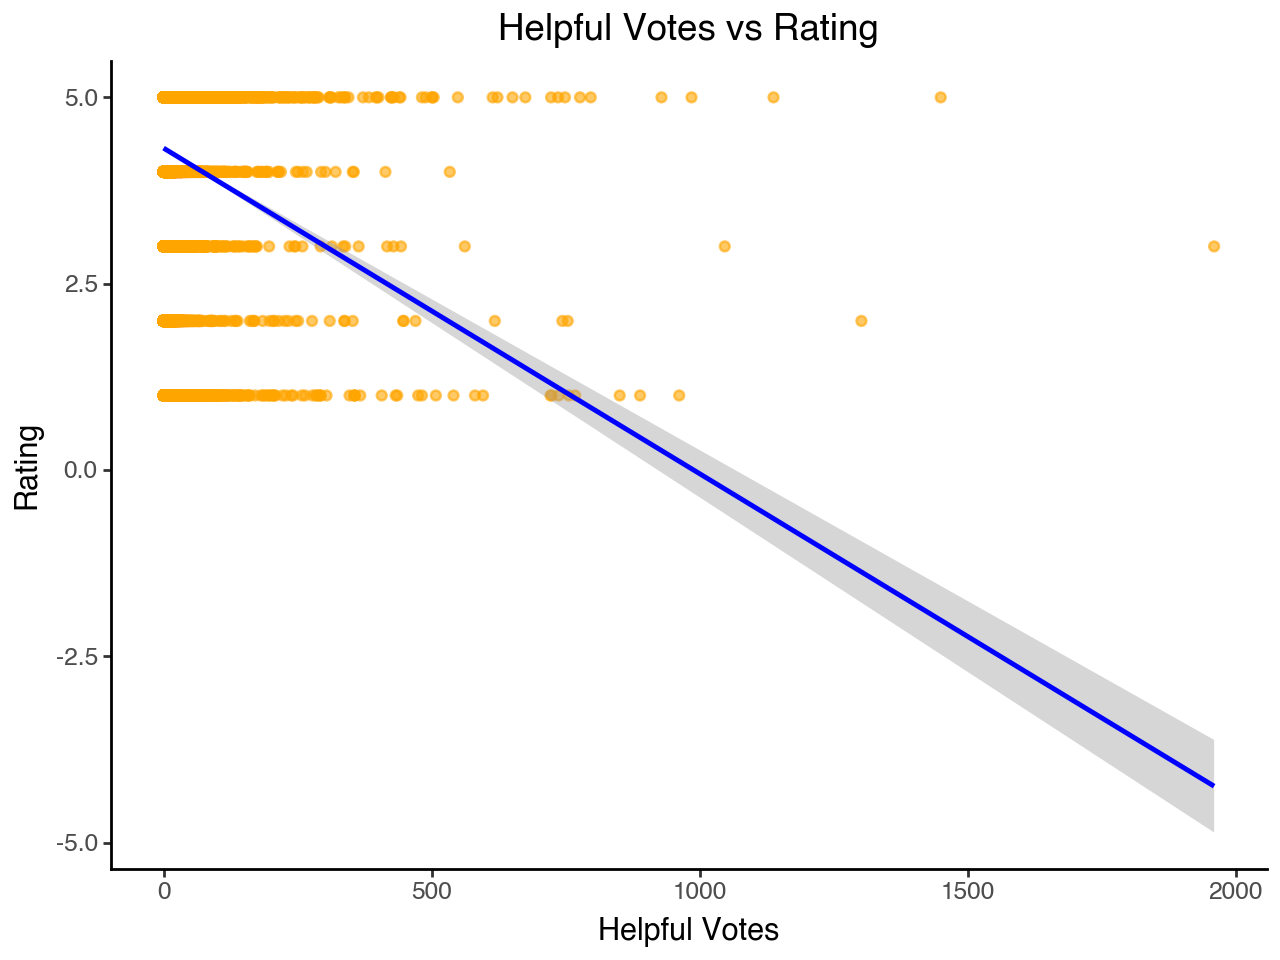

In [37]:
(ggplot(df, aes(x='helpful_vote', y='rating')) +
 geom_point(color='orange', alpha=0.6) +
 geom_smooth(method='lm', color='blue') +
 labs(title='Helpful Votes vs Rating',
      x='Helpful Votes',
      y='Rating') +
 theme_classic())